In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

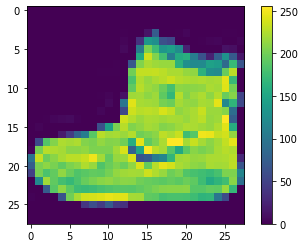

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

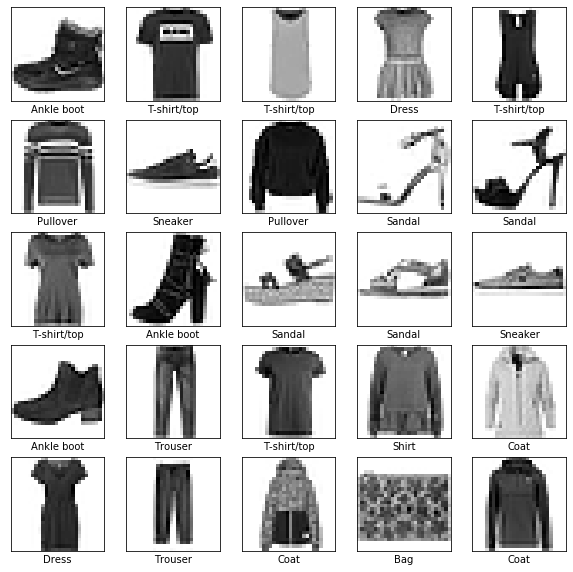

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 19s 324us/sample - loss: 0.4967 - acc: 0.8245
Epoch 2/10
60000/60000 [==============================] - 18s 308us/sample - loss: 0.3737 - acc: 0.8640
Epoch 3/10
60000/60000 [==============================] - 17s 286us/sample - loss: 0.3353 - acc: 0.8780
Epoch 4/10
60000/60000 [==============================] - 17s 287us/sample - loss: 0.3127 - acc: 0.8860
Epoch 5/10
60000/60000 [==============================] - 17s 282us/sample - loss: 0.2941 - acc: 0.8910
Epoch 6/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.2794 - acc: 0.8972
Epoch 7/10
60000/60000 [==============================] - 18s 304us/sample - loss: 0.2678 - acc: 0.9008
Epoch 8/10
60000/60000 [==============================] - 18s 304us/sample - loss: 0.2571 - acc: 0.9039
Epoch 9/10
60000/60000 [==============================] - 16s 270us/sample - loss: 0.2464 - acc: 0.9068
Epoch 10/10
60000/60000 [==============================] - 17s 2

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 4s - loss: 0.3303 - acc: 0.8848

Test accuracy: 0.8848


In [21]:
predictions = model.predict(test_images)
predictions[0]

array([3.38353220e-06, 3.18445643e-08, 7.48526531e-07, 1.05302095e-11,
       8.44995274e-09, 1.32293697e-03, 4.82680070e-06, 2.52862051e-02,
       1.96720407e-06, 9.73379970e-01], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

In [26]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

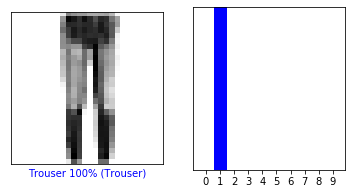

In [28]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

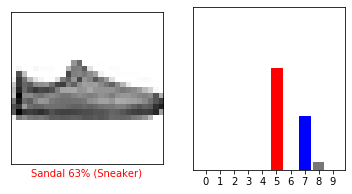

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

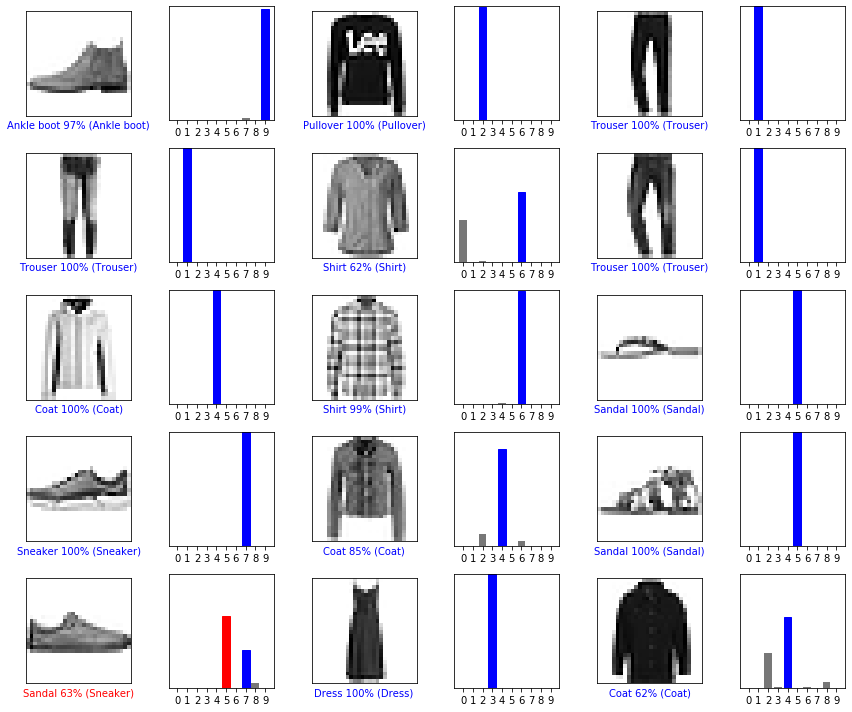

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [32]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [33]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [34]:
predictions_single = model.predict(img)

print(predictions_single)

[[2.9616820e-04 1.4958112e-16 9.9846125e-01 9.2285452e-10 4.6502307e-04
  3.8786316e-13 7.7755970e-04 3.7576184e-22 1.3701535e-09 3.6697162e-16]]


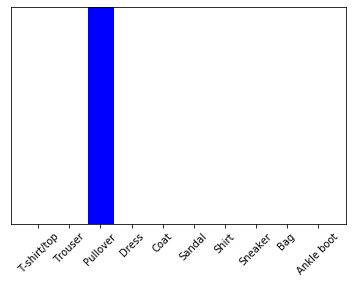

In [36]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [37]:
np.argmax(predictions_single[0])

2